# Machine Learning

In [1]:
from sklearn import preprocessing
import pandas as pd
import numpy as np

df = pd.read_csv("../../data/Cap 8/base_datos_2008.csv", nrows = 100000)

# Suprimo los datos faltantes de las columnas que nos interesa observar.
df = df[["ArrDelay", "DepDelay", "Distance", "AirTime"]].dropna()

FileNotFoundError: [Errno 2] No such file or directory: '../../data/Cap 8/base_datos_2008.csv'

In [2]:
df.head()

,ArrDelay,DepDelay,Distance,AirTime
0,-14.0,8.0,810,116.0
1,2.0,19.0,810,113.0
2,14.0,8.0,515,76.0
3,-6.0,-4.0,515,78.0
4,34.0,34.0,515,77.0


In [3]:
# Vamos a normalizar todas las variables para que estén dentro de una misma escala, centrada en 0.
X_scaled = preprocessing.scale(df)
X_scaled

array([[-0.63713243, -0.08247884,  0.40657043,  0.4452521 ],
       [-0.12045009,  0.3068154 ,  0.40657043,  0.38990966],
       [ 0.26706167, -0.08247884, -0.26709367, -0.29264705],
       ...,
       [ 1.84940134,  2.18250582,  0.53445243,  0.31611975],
       [ 0.17018373,  0.37759617,  0.53445243,  0.1869874 ],
       [ 0.17018373, -0.25943077,  0.53445243,  0.22388235]])

In [4]:
# Calculamos la media de cada una de las columnas, prácticamente es 0.
X_scaled.mean(axis = 0)

array([2.47651119e-17, 1.07267490e-17, 1.19506063e-16, 1.01364179e-16])

In [5]:
# Hacemos lo mismo con desviación estándar. Todas las variables están centradas en el 0 con una desviación estándar = 1.
X_scaled.std(axis = 0)

array([1., 1., 1., 1.])

In [6]:
# Si no tenemos una distribución de los datos el retraso en la salida 8 frente a la llegada 14 ¿cuánto es? Si no tenemos
# un escalado de los datos no se puede saber.
df.iloc[2]

ArrDelay     14.0
DepDelay      8.0
Distance    515.0
AirTime      76.0
Name: 2, dtype: float64

In [7]:
# Valor por encima de la media el primero, el tercero y cuarto por debajo de la media.
X_scaled[2]

array([ 0.26706167, -0.08247884, -0.26709367, -0.29264705])

In [8]:
# Vamos a realizar otro tipo de escalado de datos, aplicamos MinMax.
# Los datos ya no están centrados en 0, explicitamos el rango de valores que queremos que tenga.
min_max_scaler = preprocessing.MinMaxScaler([0,10])
# Adapta los datos atendiendo a nuestro dataframe
X_train_minmax = min_max_scaler.fit_transform(df)
X_train_minmax
# Hay que tener en cuenta los outliers si son muchos, en este caso quedarían fuera de la distribución.

array([[0.77199282, 0.92857143, 3.15557514, 2.91316527],
       [1.05924596, 1.125     , 3.15557514, 2.82913165],
       [1.27468582, 0.92857143, 1.85544293, 1.79271709],
       ...,
       [2.15439856, 2.07142857, 3.4023799 , 2.71708683],
       [1.22082585, 1.16071429, 3.4023799 , 2.5210084 ],
       [1.22082585, 0.83928571, 3.4023799 , 2.57703081]])

Los datos en este caso ya no están centrados en el cero y tienen otra escala.

# Clustering

https://scikit-learn.org/stable/modules/clustering.html#k-means 

El objetivo del clustering es separar una población en grupos asegurando que cada uno de ellos tenga la misma varianza. Genera conjuntos disjuntos, asignando cada punto al centroide más cercano.

In [9]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df = pd.read_csv("../../data/Cap 8/base_datos_2008.csv", nrows = 1e5)
newdf = df[["AirTime", "DepDelay"]].dropna()

In [10]:
newdf.head()

,AirTime,DepDelay
0,116.0,8.0
1,113.0,19.0
2,76.0,8.0
3,78.0,-4.0
4,77.0,34.0


In [11]:
# Número de clusters = 4, añado una semilla con random_state y utilizo todos los procesadores del portátil.
# Ajusto el modelo con fit.
kmeans = KMeans(n_clusters = 4, random_state = 0, n_jobs = -1).fit(newdf)
kmeans.labels_

# Obtenemos el cluster al que pertenecen cada una de nuestras observaciones.

C:\Users\gabriel.marin\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


array([3, 3, 1, ..., 0, 3, 3])

In [12]:
# Con la siguiente instrucción analizamos cómo han quedado distribuidos los individuos en cada uno de los grupos.
np.unique(kmeans.labels_, return_counts = True)
# Como se puede observar han quedado distribuidos de manera muy dispar, 3944 al primer grupo,...

(array([0, 1, 2, 3]), array([ 3944, 60402,  8274, 26078], dtype=int64))

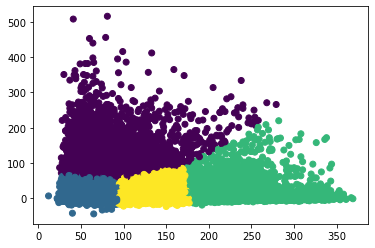

In [13]:
# Vamos a visualizar cómo quedan distribuidos los centroides.
import matplotlib.pyplot as plt
plt.scatter(newdf["AirTime"], newdf["DepDelay"], c= kmeans.labels_)
plt.show()

Se puede observar que hay dos grupos a la izquierda muy cargados y próximos, y otros dos con mucha dispersión.

In [14]:
# Vamos a ver dónde quedan situados los centroides.
kmeans.cluster_centers_

array([[ 79.50946731, 116.4478667 ],
       [ 58.86814825,   5.65975557],
       [224.74990908,  10.03576191],
       [128.07685235,   5.12600567]])

In [15]:
# Si queremos utilizar nuestro objeto kmeans para predecir a qué cluster van a pertenecer nuevos puntos.

alldf = pd.read_csv("../../data/Cap 8/base_datos_2008.csv", nrows = 1e6)[["AirTime", "DepDelay"]].dropna()

In [16]:
# Vamos a mostrar cómo quedan clasificados los primeros 100
kmeans.predict(alldf)[0:100]

array([3, 3, 1, 1, 1, 1, 2, 2, 1, 1, 3, 0, 1, 1, 1, 1, 2, 2, 3, 1, 1, 1,
       1, 1, 1, 1, 0, 3, 3, 2, 0, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 0, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1,
       1, 1, 1, 1, 3, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1,
       3, 3, 3, 2, 2, 2, 2, 2, 2, 1, 1, 2])

Si probamos con un clúster de 10...

# Regresión Lineal

In [17]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv("../../data/Cap 8/base_datos_2008.csv")

El objetivo de este modelo es aproximar a una recta el conjunto de datos. € (error del modelo).
- Es necesario que la relación entre las variables sea lineal.
- Las variables explicativas no tienen relación entre ellas.
- Homocedasticidad (varianza constante, si predecimos los salarios en base a la edad, habría que encontrar los mismos errores para gente joven que para gente mayor).
- El error total sea la suma de todos los errores.

Y se corresponde con la variable independiente y X corresponde con las variables explicativas o regresoras.

Y = $\beta_0$ +  $\beta_1$ $X_1$ +  $\beta_2$ $X_2$ +  $\beta_3$ $X_3$ + .... + €

https://blog.minitab.com/es/analisis-de-regresion-como-puedo-interpretar-el-r-cuadrado-y-evaluar-la-bondad-de-ajuste

In [18]:
# Vamos a determinar el retraso en la llegada a partir del retraso en la salida.
# Ambas variables están muy correlacionadas.
df = df.dropna(subset = ["ArrDelay"])
# Seleccionamos un subconjunto de 100.000 líneas que vamos a mezclar.
df = df.sample(frac = 1).head(100000)
# Vamos a determinar predecir el retraso en la llegada ArrDelay a partir del retraso en la salida DepDelay
Y = df["ArrDelay"]
X = df[["DepDelay"]]

In [19]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [20]:
# A continuación ajustamos el modelo.
regr = linear_model.LinearRegression()
# Ajuste con X e Y definidos con anterioridad.
regr.fit(X, Y)

# Imprimimos el valor de las Betas... corresponden con los coeficientes de las variables dependientes.
print("Coeficientes: ", regr.coef_)

# El valor próximo a 1 nos indica que está cercano a la varianza, desviación al cuadrado respecto a la media.
# Estamos explicando el 86,9 % de la varianza.

Y_pred = regr.predict(X)
# R2 nos va a decir cuán bueno es el modelo, cuanto más próximo a 1, el modelo es mejor.
print("R cuadrado: ", r2_score(Y, Y_pred))

Coeficientes:  [1.0176226]
R cuadrado:  0.868593178921136


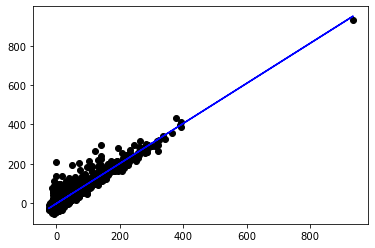

In [21]:
plt.scatter(X[1:10000], Y[1:10000], color = "black")
plt.plot(X[1:10000], Y_pred[1:10000], color = "blue")
plt.show()

# Regresión Logística

In [22]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

df = pd.read_csv("../../data/Cap 8/base_datos_2008.csv")

# En este caso el modelo se aplica a categorías que no responden a valores numéricos continuos.
# Se utiliza de forma binaria, para predecir si un cliente va a comprar un determinado producto o no.
# Los valores devueltos por la expresión se encuentran entre 0 y 1.

P(y) = $\left(\frac{1}{e^(\beta_0 + \beta_1 X_1 +  \beta_2 X_2$ +  \beta_3 X_3 + ... + €)}\right)$

In [23]:
# Vamos a determinar el retraso en la llegada a partir del retraso en la salida.
# Ambas variables están muy correlacionadas.
df = df.dropna(subset = ["ArrDelay"])
df = df.sample(frac = 1).head(100000)
Y = df["ArrDelay"] < 30 # Esta será nuestra variable respuesta: vuelos sin y con retraso (True = 1 / False = 0)
X = df[["DepDelay"]]

In [24]:
# Creamos el modelo con LogisticRegression()
logreg = LogisticRegression()
# Ajustamos el modelo con fit
logreg.fit(X, Y)
# Obtenemos las predicciones
Y_pred = logreg.predict(X)

In [25]:
# La regresión logística nos devuelve probabilidades, selecciona la categoría con probabilidad superior.
np.round(logreg.predict_proba(X),3)
# El primer caso tiene una probabilidad de un 1% de pertenecer al grupo 0 (sin retraso) y 
# un 98.2 de pertenecer al grupo 1 (con retraso)

array([[0.014, 0.986],
       [0.023, 0.977],
       [0.009, 0.991],
       ...,
       [1.   , 0.   ],
       [0.005, 0.995],
       [0.013, 0.987]])

Se puede ver que en los tres primeros casos es muy probable que el vuelo no tenga retraso notable. % elem 0,0 - % elem 0,1

In [26]:
# 95,59% de las predicciones es correcta. Vemos en qué caso nuestras predicciones coinciden con el valor real.
np.mean(Y_pred == Y)

0.95555

In [27]:
# En el caso real, tenemos una aproximación del 86,40%, sabemos que en un 86,40% de los casos el vuelo no se retrasa
np.mean(Y)

0.86423

In [28]:
# Las filas son los valores reales (Y), las columnas las predicciones (Y_pred), 10126 (False) ha predicho como 0,  
# 1028 eran los casos que no se habían retrasado, pero que nuestro modelo ha considerado que sí.
# 85596 que son los casos que no se han retrasado y nuestro modelo lo ha clasificado bien.
confusion_matrix = confusion_matrix(Y, Y_pred)
print(confusion_matrix)

# (0,0) -> En este caso el modelo ha predicho como 0 (False = con retraso) y el modelo ha predicho como 0 (con retraso).
# (0,1) -> En este caso el modelo ha predicho como 1 (True = sin retraso) y el modelo ha predicho como 0 (con retraso).
# (1,0) -> En este caso el modelo ha predicho como 0 (False = con retraso) y el modelo ha predicho como 1 (sin retraso).
# (1,1) -> En este caso el modelo ha predicho como 1 (True = sin retraso) y el modelo ha predicho como 1 (sin retraso).

[[10205  3372]
 [ 1073 85350]]


# Bayes, se expresa la probabilidad de un evento aleatorio A, dado B.

In [29]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

df = pd.read_csv("../../data/Cap 8/base_datos_2008.csv", nrows = 100000)
df = df.sample(frac = 1)
df = df.head(500000)

Para este modelo existen tres variantes vinculadas:
   - Bernouilli, se puede utilizar para el análisis de texto.
   - Multinomial, se utiliza también para el análisis de texto.
   - Gaussian, se utiliza para datos continuos, asume que las variables regresoras están distribuidas normalmente.
    
Este modelo supone que todas las variables son independientes, cosa que no es cierta.

In [30]:
df = df.dropna(subset = ["ArrDelay"])

In [31]:
# Variable respuesta, el retraso en la llegada con vuelos retrasados al menos un minuto.
Y = df["ArrDelay"] > 0

In [32]:
df["Month"] = df["Month"].apply(str)
df["DayofMonth"] = df["DayofMonth"].apply(str)
df["DayOfWeek"] = df["DayOfWeek"].apply(str)
df["TailNum"] = df["TailNum"].apply(str)

X = pd.get_dummies(data = df[["Month", "DayofMonth", "TailNum", "DayOfWeek", "Origin", "Dest", "UniqueCarrier"]])

In [33]:
X.head()

,Month_1,DayofMonth_1,DayofMonth_10,DayofMonth_11,DayofMonth_12,DayofMonth_13,DayofMonth_14,DayofMonth_15,DayofMonth_16,DayofMonth_17,...,Dest_SMF,Dest_SNA,Dest_STL,Dest_SYR,Dest_TPA,Dest_TUL,Dest_TUS,Dest_XNA,UniqueCarrier_WN,UniqueCarrier_XE
49955,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
49669,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
52995,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
770,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
64222,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [34]:
# Ajustar el modelo
clf = BernoulliNB()
#clf = MultinomialNB()
clf.fit(X, Y)
Y_pred = clf.predict(X)

In [35]:
np.mean(Y == Y_pred)
# Nos predice casi un 66% de los casos.

0.6598512634501206

In [36]:
1 - np.mean(Y)
# Estamos ganando un 8% más en nuestro análisis explicativo.

0.5789681655150054

In [37]:
X = df[["AirTime", "Distance", "TaxiIn", "TaxiOut"]] #Depdelay
clf = GaussianNB()
clf.fit(X, Y)
Y_pred = clf.predict(X)

In [38]:
np.mean(Y == Y_pred)

0.6428093781028997

In [39]:
X = df[["AirTime", "Distance", "TaxiIn", "TaxiOut", "DepDelay"]] #Depdelay
clf = GaussianNB()
clf.fit(X, Y)
Y_pred = clf.predict(X)

In [40]:
np.mean(Y == Y_pred)

0.8201078036029099

# Árboles de Clasificación y Regresión

https://fhernanb.github.io/libro_mod_pred/arb-de-regre.html

In [ ]:
from sklearn import tree
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score

# Eliminamos con dropna el subset ArrDelay los datos faltantes,
# Reordenamos con sample (frac = 1)
# Partimos en dos dataframes, el último medio millón de casos y los primeros.

df = pd.read_csv("../../data/Cap 8/base_datos_2008.csv")
df = df.dropna(subset = ["ArrDelay"])
df = df.sample(frac = 1)
dftest = df.tail(500000)
df = df.head(500000)

In [ ]:
clf = tree.DecisionTreeClassifier()

# Entrenaremos el objeto clf utilizando el método fit con la variable regresora X y la respuesta Y

X = df[["Distance", "AirTime", "DepTime", "TaxiIn", "TaxiOut", "DepDelay"]]
X_test = dftest[["Distance", "AirTime", "DepTime", "TaxiIn", "TaxiOut", "DepDelay"]]
Y = df["ArrDelay"] > 10
Y_test = dftest["ArrDelay"] > 10

clf = clf.fit(X, Y)
Y_pred = clf.predict(X)
Y_pred_test = clf.predict(X_test)

In [ ]:
np.mean(Y == Y_pred)

In [ ]:
# Nuestro modelo está clasificando perfectamente todos los datos.
# Crea un árbol que predice exactamente todas las observaciones, hay que evitarlo.
# Para ello, hay que comparar el conjunto de test con la previsión, hacemos una validación externa con el conjunto test.

np.mean(Y_test == Y_pred_test)

In [ ]:
# Utilizando el R-cuadrado, una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada.

clf = tree.DecisionTreeClassifier()

Y = df["ArrDelay"]
Y_test = dftest["ArrDelay"]

clf = clf.fit(X, Y)
Y_pred = clf.predict(X)
Y_pred_test = clf.predict(X_test)

print("R cuadrado: ", r2_score(Y, Y_pred))
print("R cuadrado test: ", r2_score(Y_test, Y_pred_test))


# Random Forest

In [ ]:
# Selecciona de forma aleatoria observaciones de nuestra base de datos. Crea nuevos árboles de regresión y clasificación.
# Da un peso variable a las distintas observaciones y variables.

from sklearn import tree
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv("../../data/Cap 8/base_datos_2008.csv")
df = df.dropna(subset = ["ArrDelay"])
df = df.sample(frac = 1)
dftest = df.tail(500000)
df = df.head(500000)

In [ ]:
clf = tree.DecisionTreeClassifier()

X = df[["Distance", "AirTime", "DepTime", "TaxiIn", "TaxiOut", "DepDelay"]]
X_test = dftest[["Distance", "AirTime", "DepTime", "TaxiIn", "TaxiOut", "DepDelay"]]
Y = df["ArrDelay"] > 10

# Variable respuesta
Y_test = dftest["ArrDelay"] > 10

# Entrenando nuestro modelo
clf = clf.fit(X, Y)
Y_pred_test = clf.predict(X_test)

In [ ]:
np.mean(Y_test == Y_pred_test)

In [ ]:
# Vamos a comparar con RandomForest, generamos 100 árboles y que utilice todos los núcleos de nuestro PC

clf = RandomForestClassifier(n_estimators = 100, n_jobs = -1)
clf.fit(X, Y)
Y_pred_test = clf.predict(X_test)

# Clasificamos las variables con mayor importancia, el retraso de salida DepDelay es el más aproximado.
clf.feature_importances_

In [ ]:
# Incrementa en un 3% la predicción del modelo anterior (árbol de clasificación).
np.mean(Y_test == Y_pred_test)

In [ ]:
# Si la variable respuesta fuera numérica utilizaríamos
# RandomForestRegressor()
# La métrica sería R2 en lugar de la comparación entre el modelo de test y el predictivo.

# Support Vector Machine

https://scikit-learn.org/stable/modules/svm.html

In [ ]:
# Divide los conjuntos de puntos mediante una recta, intentando maximizar la distancia de los puntos más cercanos a la recta.

from sklearn.svm import SVC
import numpy as np
import pandas as pd

df = pd.read_csv("../../data/Cap 8/base_datos_2008.csv")
df = df.dropna(subset = ["ArrDelay"])
df = df.sample(frac = 1)
dftest = df.tail(1000)
df = df.head(1000)

In [ ]:
X = df[["Distance", "AirTime", "DepTime", "TaxiIn", "TaxiOut", "DepDelay"]]
X_test = dftest[["Distance", "AirTime", "DepTime", "TaxiIn", "TaxiOut", "DepDelay"]]
Y = df["ArrDelay"] > 10

# Variable respuesta
Y_test = dftest["ArrDelay"] > 10

# Entrenando nuestro modelo
clf = SVC() # kernel = "linear"
clf = clf.fit(X, Y)
Y_pred_test = clf.predict(X_test)

In [ ]:
np.mean(Y_test == Y_pred_test)

# Modelo K-Nearest

In [ ]:
# Clasifica cada punto en una categoría dependiendo de sus vecinos más cercanos.
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd

df = pd.read_csv("../../data/Cap 8/base_datos_2008.csv", nrows = 1e6)

In [ ]:
newdf = df[["AirTime", "Distance", "TaxiOut", "ArrDelay"]].dropna()
cols = newdf[newdf.columns[newdf.columns != "ArrDelay"]]

In [ ]:
filtro = newdf["ArrDelay"] > 10

In [ ]:
# Ponemos etiquetas a nuestros casos.
newdf["ArrDelay"][filtro] = "Delayed"
newdf["ArrDelay"][filtro == False] = "Not Delayed"

In [ ]:
newdf["ArrDelay"].head()

In [ ]:
nbrs_3 = KNeighborsClassifier(n_neighbors = 3, n_jobs = -1)

In [ ]:
nbrs_3.fit(cols, newdf["ArrDelay"])

In [ ]:
predicciones_3 = nbrs_3.predict(cols)

In [ ]:
np.mean(predicciones_3 == newdf["ArrDelay"])

In [ ]:
# El 80,4% están clasificados correctamente, esta medida puede ser engañosa, ya que no conocemos la proporción de nuestros datos
np.mean(newdf["ArrDelay"] == "Not Delayed")

In [ ]:
# Casi el 70% de vuelos no se han retrasado, con el modelo estamos indicando 80,4%, hay una desviación de 10 puntos.
# Vamos a ir ajustando mejor la métrica, miramos solo el vecino de al lado.
nbrs_1 = KNeighborsClassifier(n_neighbors = 1, n_jobs = -1)
nbrs_1.fit(cols, newdf["ArrDelay"])
predicciones_1 = nbrs_1.predict(cols)
np.mean(predicciones_1 == newdf["ArrDelay"])

In [ ]:
# Observando el vecino más cercano obtenemos una mejor predicción que observando los tres más cercanos.
np.mean(newdf["ArrDelay"] == "Not Delayed")

In [ ]:
# Exploramos la matriz de confusión para ver cuánto de bien hemos predicho los casos.
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(newdf["ArrDelay"], predicciones_1)
print(confusion_matrix)

In [ ]:
# El elmento (1,1) es el número de vuelos que no se retrasan y que predecimos que no se retrasan
# El elemento (0,0) es el número de vuelos que se retrasan y que predecimos como que se retrasan
# El elemento (0,1) son vuelos que no se retrasan pero que hemos clasificado como que sí se retrasan
# El elemento (1,0) son vuelos que se retrasan pero que hemos clasificado como que no se retrasan

# Validación Externa en Python

Cuando usemos todos los datos para entrenar y evaluar, tenemos evaluación interna. Si tenemos un conjunto de datos para entrenar y otro para evaluar estamos en la evaluación externa.
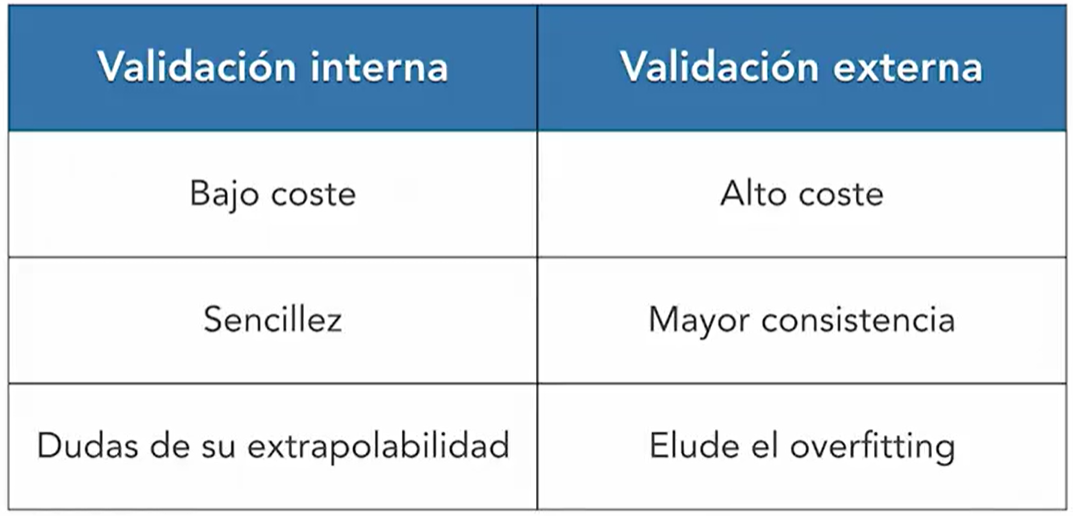

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

In [ ]:
data = pd.read_csv("../../data/Cap 8/base_datos_2008.csv")

In [ ]:
df = data.dropna(subset = ["ArrDelay"])
df = df.sample(frac=1).head(1000)

X = df[['AirTime', 'Distance', 'DepDelay']]
Y = df['ArrDelay']

In [ ]:
# El tamaño del test se establece en un 20% e incluimos el atributo random_state = 10 fijo una semilla para que cuando 
# se vuelva a repetir el ejercicio obtener el mismo resultado.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size =.2, random_state = 10)

In [ ]:
# En este primer caso estamos ajustando un modelo R2 teniendo en cuenta el conjunto de datos
regrINTERNA = linear_model.LinearRegression()
regrINTERNA.fit(X, Y)
prediccionesINTERNA = regrINTERNA.predict(X)
print("R2: ", r2_score(Y, prediccionesINTERNA))

# En este segundo caso estamos ajustando un modelo R2 teniendo en cuenta el conjunto de entrenamiento y test
regrEXTERNA = linear_model.LinearRegression()
regrEXTERNA.fit(X_train, y_train)
prediccionesEXTERNA = regrEXTERNA.predict(X_test)
print("R2: ", r2_score(y_test, prediccionesEXTERNA))

# En principio el R2 correspondiente al ajuste con todos los datos y lo evaluamos con los mismos datos, 
# tendemos a sobreajustar el modelo, esto implica tener unos resultados de predicción mucho más elevados
# que en el caso de utilizar unos datos de entrenamiento. 

# K-Fold

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.metrics import r2_score
import numpy as np

# En el caso anterior dependiendo de los datos que caigan en Train o en Testing el R2 variará.
# Con K-Fold lo que hacemos es obtener una media de un conjunto de particiones de datos, de forma que el resultado
# obtenido puede ser más fiable.
# Replicamos múltiples veces este proceso:  
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size =.2, random_state = 10)

In [ ]:
data = pd.read_csv("../../data/Cap 8/base_datos_2008.csv")

In [ ]:
df = data.dropna(subset = ["ArrDelay"])
df = df.sample(frac=1).head(5000)

# Reseteamos el index de nuestra base de datos al hacer selección aleatoria.
df = df.reset_index()

X = df[['AirTime', 'Distance', 'DepDelay']]
Y = df['ArrDelay']

In [ ]:
# Hacemos una partición en 10 bloques, y cada vez que haga una partición mezcle los datos shuffle = True
kf = KFold(n_splits = 10, shuffle = True)
kf.get_n_splits(X)

In [ ]:
regr = linear_model.LinearRegression()

# Creamos un vector donde vamos a estar guardando todos los resultados.
resultados = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index,], X.loc[test_index,]
    y_train, y_test = Y[train_index], Y[test_index]
    regr.fit(X_train, y_train)
    predicciones = regr.predict(X_test)
    print("R2: ", r2_score(y_test, predicciones))
    resultados.append(r2_score(y_test, predicciones))
print("R2 medio: ", np.mean(resultados))

# Compensamos la dependencia de datos concretos, es mucho más representativa utilizar KFold

# Leave one out

In [ ]:
# En este caso vamos a entrenar el modelo con todos los datos menos uno.
# De utilidad cuando tenemos tamaños de muestra muy reducidos, ya que si no repeteríamos el proceso n-1 veces.
import pandas as pd
from sklearn.model_selection import LeaveOneOut
from sklearn import linear_model
import numpy as np

In [ ]:
data = pd.read_csv("../../data/Cap 8/base_datos_2008.csv")

In [ ]:
df = data.dropna(subset = ["ArrDelay"])
df = df.sample(frac=1).head(5000)

# Reseteamos el index de nuestra base de datos al hacer selección aleatoria.
df = df.reset_index()

X = df[['AirTime', 'Distance', 'DepDelay']]
Y = df['ArrDelay']

In [ ]:
loo = LeaveOneOut()

In [ ]:
for train_index, test_index in loo.split(X):
    X_train, X_test = X.loc[train_index,], X.loc[test_index,]
    y_train, y_test = Y[train_index], Y[test_index]
    regr.fit(X_train, y_train)
    predicciones = regr.predict(X_test)
    print("Error: ", (y_test - predicciones[0])**2)

# Redes Neuronales

https://es.wikipedia.org/wiki/Red_neuronal_artificial

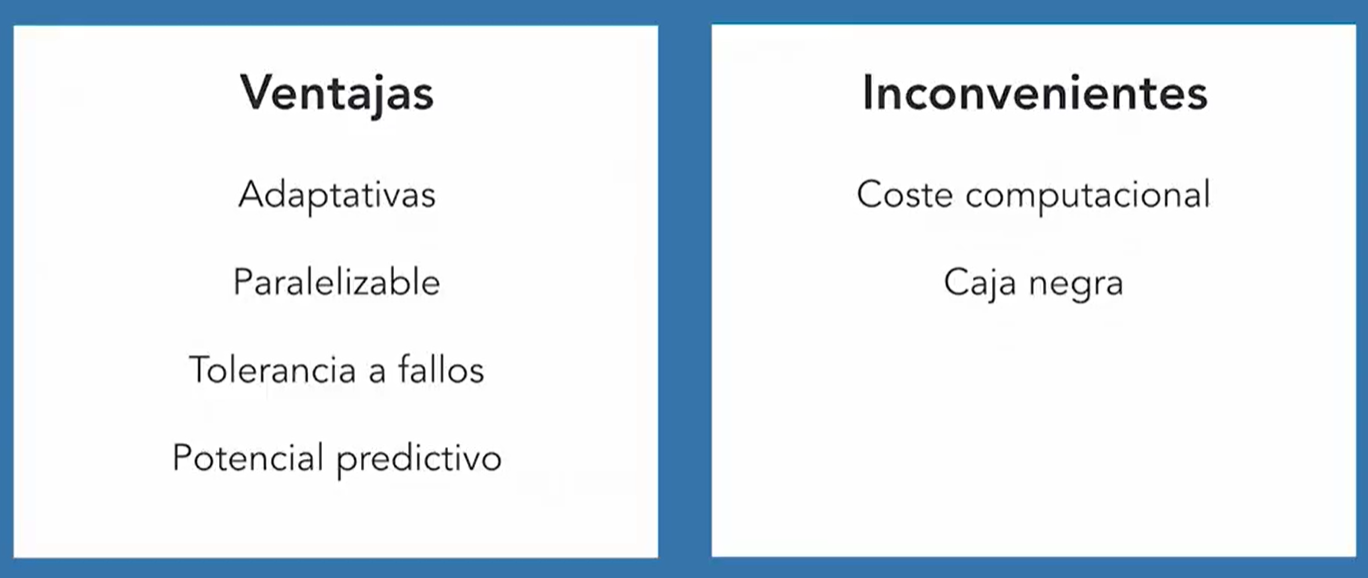

In [ ]:
## Esta primera si tenemos datos categóricos.
from sklearn.neural_network import MLPClassifier
## Esta segunda si tenemos datos numéricos.
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd

In [ ]:
data = pd.read_csv("../../data/Cap 8/base_datos_2008.csv")

In [ ]:
df = data.dropna(subset = ['AirTime', 'Distance', 'TaxiIn', 'TaxiOut', 'DepDelay'])
df = df.sample(frac = 1).head(1000)

In [ ]:
X = df[['AirTime', 'Distance', 'TaxiIn', 'TaxiOut', 'DepDelay']]
Y = df['ArrDelay']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size =.2, random_state = 1)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
clf = MLPRegressor(solver = 'lbfgs', alpha = 1e-5, hidden_layer_sizes = (5,))

model = clf.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R cuadrado: ", r2_score(y_test, predictions))

# XGBoost y árboles de clasificación

In [ ]:
# pip install xgboost
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd

In [ ]:
data = pd.read_csv("../../data/Cap 8/base_datos_2008.csv")

In [ ]:
df = data.dropna(subset = ["ArrDelay"])
df = df.sample(frac = 1).head(10000)

X = df[['AirTime', 'Distance', 'TaxiIn', 'TaxiOut', 'DepDelay']]
Y = df['ArrDelay']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size =.2, random_state = 1)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = XGBRegressor(n_jobs = -1, learning_rate = .5, max_depth = 2, colsample_bytree = 1, verbosity = 2, subsample = 1,
                     n_estimators = 500)
model.fit(X_train, y_train)

In [ ]:
predictions = model.predict(X_test)
print("R cuadrado: ", r2_score(y_test, predictions))

# Seleccionar Variables en Machine Learning

A veces no es recomendable ajustar los modelos con todas las columnas del modelo de datos.

In [ ]:
from sklearn import linear_model
import statsmodels.api as sm
import pandas as pd

In [ ]:
data = pd.read_csv("../../data/Cap 8/base_datos_2008.csv")

In [ ]:
df = data.dropna(subset = ['AirTime', 'Distance', 'TaxiIn', 'TaxiOut', 'DayOfWeek', 'DayofMonth', 'Month', 'DepDelay', 'WeatherDelay'])
df = df.sample(frac=1).head(1000)

In [ ]:
X = df[['AirTime', 'Distance', 'TaxiIn', 'TaxiOut', 'DayOfWeek', 'DayofMonth', 'Month', 'DepDelay', 'WeatherDelay']]
Y = df['ArrDelay']

# ¿Son necesarias todas estas variables? Veamos la importancia de las variables en el modelo.

regr = linear_model.LinearRegression()
regr.fit (X, Y)
predicciones = regr.predict(X)

In [ ]:
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

# la columna P, se trata de los p-valores, indican lo relevante o no de cada variable en el modelo.
# Si el valor es 0 la respuesta es significativa, en caso contrario, la columna puede ser prescindible en el ajuste del modelo.

In [ ]:
# Si cambiamos una variable, vemos cómo afecta al resto. Suprimimos DayOfWeek y vemos cómo afecta al resto.

X = df[['AirTime', 'Distance', 'TaxiIn', 'TaxiOut', 'DayofMonth', 'Month', 'DepDelay', 'WeatherDelay']]
Y = df['ArrDelay']

regr = linear_model.LinearRegression()
regr.fit (X, Y)
predicciones = regr.predict(X)

In [ ]:
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

In [ ]:
# Si cambiamos una variable, vemos cómo afecta al resto. Suprimimos DayofMonth y vemos cómo afecta al resto.

X = df[['AirTime', 'Distance', 'TaxiIn', 'TaxiOut', 'Month', 'DepDelay', 'WeatherDelay']]
Y = df['ArrDelay']

regr = linear_model.LinearRegression()
regr.fit (X, Y)
predicciones = regr.predict(X)

In [ ]:
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

In [ ]:
# Si cambiamos una variable, vemos cómo afecta al resto. Suprimimos Month y vemos cómo afecta al resto.

X = df[['AirTime', 'Distance', 'TaxiIn', 'TaxiOut', 'DepDelay', 'WeatherDelay']]
Y = df['ArrDelay']

regr = linear_model.LinearRegression()
regr.fit (X, Y)
predicciones = regr.predict(X)

In [ ]:
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

In [ ]:
# Por último WeatherDelay

X = df[['AirTime', 'Distance', 'TaxiIn', 'TaxiOut', 'DepDelay']]
Y = df['ArrDelay']

regr = linear_model.LinearRegression()
regr.fit (X, Y)
predicciones = regr.predict(X)

In [ ]:
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

Lo que estaba ocurriendo es que estábamos tratando las variables no numéricas como números... Por eso no eran relevantes.
Python estaba tratando estas variables como si el día 2 fuese el doble que el día 1,...
Se puede arreglar ajustando el modelo con dummies, de forma que no haya diferencia entre el mes 1 y el 10 por ejemplo.

# Selección automatizada de variables en Machine Learning

In [ ]:
from sklearn.feature_selection import RFE
from sklearn import linear_model
import pandas as pd

In [ ]:
data = pd.read_csv("../../data/Cap 8/base_datos_2008.csv")

In [ ]:
df = data.dropna(subset = ['AirTime', 'Distance', 'TaxiIn', 'TaxiOut', 'DayOfWeek', 'DayofMonth', 'Month', 'DepDelay', 'WeatherDelay'])
df = df.sample(frac=1).head(1000)

X = df[['AirTime', 'Distance', 'TaxiIn', 'TaxiOut', 'Month', 'DepDelay', 'WeatherDelay']]
Y = df['ArrDelay']

regr = linear_model.LinearRegression()

In [ ]:
# Detectaremos con linear_model.LinearRegression() cuáles son las variables más útiles.
selector = RFE(estimator = regr, n_features_to_select = 5)

# Entrenamos el objeto selector con nuestros datos
selector.fit(X, Y)

In [ ]:
# Mostramos los resultados, con qué variables nos hemos quedado.
print(selector.ranking_)

In [ ]:
# El resultado anterior nos da el ranking, pero no los nombres de las variables con las que nos hemos quedado.
X.columns[selector.support_]

In [ ]:
# Modificamos a 1 el número de objetos con los que me quedo.
selector = RFE(estimator = regr, n_features_to_select = 1)
selector.fit(X,Y)

In [ ]:
# Mostramos los resultados, con qué variables nos hemos quedado.
print(selector.ranking_)

In [ ]:
# Ahora vemos cuál es la variable más relevante, la más correlacionada.
X.columns[selector.support_]

# Fundamentos de PCA (Principal Component Analysis)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv("../../data/Cap 8/base_datos_2008.csv")

In [ ]:
# Con PCA comprimimos la variabilidad de las columnas que tenemos en menos columnas. Reducimos la dimensionalidad de matrices.
df = data.dropna(subset = ['AirTime', 'Distance', 'TaxiIn', 'TaxiOut', 'DepDelay', 'ArrDelay'])
df = df.sample(frac=1).head(1000)

X = df[['AirTime', 'Distance', 'TaxiIn', 'TaxiOut', 'DepDelay', 'ArrDelay']]

# Lo más importante es escalar las variables, ya que los pesos de cada una deben ser iguales (Distancia es mayor que retraso).
scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)

In [ ]:
pca = PCA(n_components = 2)
pca.fit(X)

In [ ]:
pca.components_

In [ ]:
print(np.round(pca.components_, 2))

'AirTime', 'Distance', 'TaxiIn', 'TaxiOut', 'DepDelay', 'ArrDelay'
El efecto que tiene la primera y segunda variable (creadas con PCA) sobre el resto de componentes.
Vemos qué porcentaje de varianza de los datos originales queda resumido en los dos componentes del array representado con PCA.

In [ ]:
pca.explained_variance_ratio_

In [ ]:
# El primer componente ocupa el 36 % de la variabilidad y el segundo un 31 %.
# Ahora visualizamos los resultados obtenidos.
nuevosvalores = pca.transform(X)

In [ ]:
plt.scatter(nuevosvalores[:, 0], nuevosvalores[:, 1])

In [ ]:
# Vemos como se distribuyen los vuelos de la BD en este nuevo espacio, casi un 68 % de la variabilidad. Esto es útil para ahorro
# de memoria y visualizar resultados.

# Imputación de valores en Machine Learning

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn import linear_model
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv("../../data/Cap 8/base_datos_2008.csv")

In [ ]:
df = data.sample(frac = 1).head(10000)
X = df[['AirTime', 'Distance', 'TaxiIn', 'TaxiOut', 'DepDelay', 'ArrDelay', 'CarrierDelay']]

In [ ]:
X

In [ ]:
# En este caso tenemos muchos datos faltantes en la columna CarrierDelay
# Podemos en este caso obviarlo, o bien imputarle un valor, que escogeremos basándonos de cierta información.

# Vamos en un primer caso a proporcionar el valor medio y en segundo caso calcular el valor en función del resto de valores.
# En el primer caso, utilizando el valor medio estaremos subestimando la varianza, reducen la varianza de la columna, sin 
# incrementarla.

imp = SimpleImputer(missing_values = np.nan, strategy = "mean")
imp.fit(X)

In [ ]:
X2 = imp.fit_transform(X)

In [ ]:
pd.DataFrame(X2)
# los datos que faltaban tienen el valor medio.

In [ ]:
# Establezcamos una estructura de correlación en nuestra base de datos, en este caso es fácil, el retraso de salida y llegada.
X.corr()

In [ ]:
# Observamos que las filas que tienen mayor correlación con CarrierDelay son el retraso ArrDelay y DepDelay.
# Vamos a ajustar un modelo de regresión que prediga CarrierDelay en aquellos casos donde no tenemos valor, en función de
# ArrDelay y DepDelay.

X = X.dropna(subset = ["DepDelay", "ArrDelay"])
newX = X[["DepDelay", "ArrDelay", "CarrierDelay"]]
newX_train = newX[np.isnan(X.CarrierDelay) == False]

regr = linear_model.LinearRegression()
regr.fit(newX_train[["DepDelay", "ArrDelay"]], newX_train["CarrierDelay"])

In [ ]:
regr.coef_

In [ ]:
# Estoy recogiendo todas las columnas regresoras (DepDelay, ArrDelay) de aquellos vuelos que no tengan valor en CarrierDelay

valores_imputacion = newX[np.isnan(X.CarrierDelay)]
valores_imputacion = valores_imputacion[["DepDelay", "ArrDelay"]]

In [ ]:
# Con estos datos, predeciremos los nuevos valores.
nuevos_valores = regr.predict(valores_imputacion)

In [ ]:
# Ahora sustituyo aquellas columnas CarrierDelay que no tienen información, por el dato obtenido.
X.loc[np.isnan(X.CarrierDelay), "CarrierDelay"] = nuevos_valores

In [ ]:
X

# Text Mining

In [ ]:
# pip install nltk
# Utilizaremos el paquete nltk, habrá que instalarlo si no lo está, además de descargar nuevas funcionalidades mediante
# el método download.
import nltk
import string

nltk.download('punkt')
nltk.download('stopwords')

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords

# Para hacer pruebas utilizaremos este texto.
texto = open("../../data/Cap 8/textoANSI.txt", "r").read()

In [ ]:
# Partiremos nuestro texto en frases.
frases = sent_tokenize(texto)

In [ ]:
print(frases)

In [ ]:
# Ahora partimos el texto en palabras.
palabras = word_tokenize(texto)
print(palabras)

In [ ]:
# Para que no incluya signos de puntuación....
fdist = FreqDist(palabras)

In [ ]:
# Nos muestra las palabras más utilizadas en el texto. Si quiero analizar un texto, estas palabras aparecen en todos.
fdist.most_common(20)

In [ ]:
# Estamos viendo conjunciones, preposiciones, signos de puntuación... esto no sirve de nada para analizar un texto.
# Suprimiremos este tipo de palabras... mediante la función stopwords.words("spanish")

stop_word = stopwords.words("spanish")
print(stop_word)

In [ ]:
# Hemos obtenido el conjunto de palabras menos significativos.
# Extraemos toda esta lista de nuestro listado de palabras a analizar.
palabras2 = [x for x in palabras if x not in stop_word]
palabras2

In [ ]:
# Las comas siguen apareciendo, para ello, ajustamos el tipo de proceso.

palabras = word_tokenize(texto.lower())

In [ ]:
# string.punctuation son los símbolos de puntuación, los incluyo para que la lista tenga un significado concreto.
palabras2 = [x for x in palabras if x not in stop_word + list(string.punctuation)]
palabras2

In [ ]:
FreqDist(palabras2).most_common(20)

# Utilización de Stemmer para reducir palabras a la raíz

Cuando usuamos una función de estilo Stemmer es reducir las palabras a la raíz.

In [ ]:
import nltk
import string

nltk.download('punkt')
nltk.download('stopwords')

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.probability import FreqDist

texto = open("../../data/Cap 8/textoANSI.txt", "r").read()
stop_words = stopwords.words("spanish")


In [ ]:
palabras = [x for x in word_tokenize(texto.lower()) if x not in stop_words + list(string.punctuation)]

In [ ]:
palabras

In [ ]:
# Vamos a reducir las conjugaciones de verbos / palabras a su raíz.

stemmer = SnowballStemmer("spanish")

In [ ]:
raices = []
for palabra in palabras:
    raices.append(stemmer.stem(palabra))

In [ ]:
raices

In [ ]:
# Esto nos permite que al hacer recuento de frecuencias no nos afecte las derivaciones de una determinada palabra.
FreqDist(raices).most_common(20)

In [ ]:
FreqDist(palabras).most_common(20)

# Traducciones de Texto con Google Translator

In [ ]:
# pip install googletrans==3.1.0a0
from googletrans import Translator

In [ ]:
translator = Translator()

In [ ]:
print(translator.detect("Esto es un curso de Python"))

In [ ]:
print(translator.detect("This es un curso de Python"))

In [ ]:
# Vamos a ver cómo podemos traducir de forma sencilla.

print(translator.translate("Esto es un curso de Python"))

In [ ]:
peliculas = translator.translate(["Indiana Jones En busca del arca perdida", "Indiana Jones y El templo maldito","Indiana Jones y La última cruzada","El reino de la calavera de cristal"])

In [ ]:
for pelicula in peliculas:
    print(pelicula.origin, "->", pelicula.text)

# Análisis de Sentimiento

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
import pandas as pd

# He creado una lista de opiniones, la primera etiqueta si es positiva o negativa, la segunda las opiniones.

lista1 = ["Bueno", "Malo", "Malo", "Malo", "Bueno", "Bueno", "Malo", "Bueno", "Bueno", "Malo"]
lista2 = ["Lo recomendaría a todos mis amigos",
         "Es el peor producto que he comprado nunca",
         "Ni loco compraría este producto", 
         "No se lo recomendaría ni a mi enemigo", 
         "Es un buen producto, sí que lo recomendaría", 
         "Me ha encantado", 
         "Es una basura absoluta, ni me molesté en lavarlo, lo tiré directamente",
         "El enemigo público número uno de la suciedad",
         "Es un producto genial, se lo recomendaría a todos los compradores",
         "Hay que estar loco para comprar esta basura"]

df = pd.DataFrame({"Sentimiento":lista1, "Valoracion":lista2 })

# Preparamos el objeto modelación para realizar un modelo.

# Quitamos del modelo todo aquello que no sean letras en minúscula ni mayúscula ni números.
# Con ngram_range (1,2) se indican parejas de palabras, p.e. enemigo público es pareja de palabras... dependiendo del contexto
# puede ser positivo o negativo.
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
# ngram_range si pongo (1,1) indico solo que quiero las palabras; si pongo (1,2) incluye parejas de palabras 
# (p.e.enemigo público)... podemos indicar las secuencias de palabras que queramos.
# Podemos ver qué pasa con la escucha de tweets...
cv = CountVectorizer(lowercase = True, ngram_range = (1,2), tokenizer = token.tokenize)
# Vamos a decirle que entrene la columna de valoración
text_counts = cv.fit_transform(df['Valoracion'])

In [ ]:
# Obtenemos el número de palabras y pareja de palabras, contando cuántas veces aparecen. En este caso, como 
# el número de texto es pequeño solo encontramos las parejas de palabras una vez. Todo esto nos ayudará a obtener un 
# modelo predictivo, que veremos a continuación... interesantísimo para clasificación de tweets.
print(text_counts)

In [ ]:
# Crearemos una muestra de train y test para analizar cómo es de acertado el modelo.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_counts, df['Sentimiento'], test_size = 0.5, random_state = 1)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

clf = MultinomialNB().fit(X_train, y_train)

predicted = clf.predict(X_test)

print("MultinomialNB Accuracy:", metrics.accuracy_score(y_test, predicted))

In [ ]:
y_test

In [ ]:
predicted

In [ ]:
# Idea para práctica -- Hacer lo mismo con tweets, aplicando un modelo.

# Web Scraping

In [ ]:
# Entrar en la url https://www.crummy.com/software/BeautifulSoup/bs4/doc/ 

In [ ]:
# pip install beautifulsoup4
from bs4 import BeautifulSoup
import requests

url = "https://es.wikipedia.org/wiki/Python"
pagina = requests.get(url)
soup = BeautifulSoup(pagina.content, 'html.parser')

# Elementos anidados.
print(soup.prettify())

In [ ]:
# Elementos sin anidar.
list(soup.children)

In [ ]:
soup.title

In [ ]:
soup.title.parent

In [ ]:
for child in soup.title.children:
    print(child)

In [ ]:
# Busca la primera vez que encuentra a
soup.a

In [ ]:
soup.find_all("a")

In [ ]:
# Si buscamos por p, tendremos el texto, interesante para hacer un análisis de text mining.
soup.find_all("p")

In [ ]:
soup.find(id = "Enlaces_externos")

In [ ]:
enlaces = soup.find(id = "Enlaces_externos")

In [ ]:
enlaces

In [ ]:
enlaces.contents

In [ ]:
enlaces = soup.findAll("div", {'class': 'listaref'})

In [ ]:
# Obtenemos los enlaces, pero existe demasiado código.
enlaces

In [ ]:
soup.find_all("li")

In [ ]:
# Obtenemos los enlaces que estaban escritos.
for d in soup.find('div', attrs = {'class': 'listaref'}).descendants:
    if d.name == 'span' and d.get('class', '') == ['reference-text']:
        print(d.text)

In [ ]:
data = soup.find('div', attrs = {'class': 'listaref'})
for div in data:
    links = div.findAll('a')
    for a in links:
        if a['href'].startswith("http"):
            print(a["href"])

# Extracción de Texto usando BeautifulSoup

In [ ]:
from bs4 import BeautifulSoup
import requests

url = "https://es.wikipedia.org/wiki/Python"
pagina = requests.get(url)
soup = BeautifulSoup(pagina.content, 'html.parser')

# Elementos anidados.
print(soup.prettify())

In [ ]:
# Con esta función se recoge texto, pero incorpora cosas que no nos interesa.
print(soup.get_text())

In [ ]:
# Si queremos visualizar el cuerpo del artículo, podemos hacerlo de la siguiente forma
soup.find("body")

In [ ]:
# De esta forma podríamos buscar los elementos categorizados por ejemplo con p
soup.find("body").find_all('p')

In [ ]:
# La información está pendiente de procesar para obtenerla limpia.
elementos = soup.find("body").find_all('p')

In [ ]:
elementos

In [ ]:
# Ahora disponemos de una lista con los elementos separados por párrafos.
# Vamos a utilizar una función para limpiar todo el código html

import re

def limpiarhtml(html):
    expresion = re.compile('<.*?>')
    texto = re.sub(expresion, '', html)
    return texto

In [ ]:
for elem in elementos:
    print(limpiarhtml(str(elem)))

# Obtención de Información no Contextual

In [ ]:
from bs4 import BeautifulSoup
import requests, re

url = "https://es.wikipedia.org/wiki/Python"
pagina = requests.get(url)
soup = BeautifulSoup(pagina.content, 'html.parser')

In [ ]:
# Obtenemos todos los enlaces que apuntan fuera de la Wikipedia.
for link in soup.findAll('a', attrs = {'href': re.compile("^http://")}):
    print(link.get('href'))

In [ ]:
# Buscamos ahora todos los enlaces que apuntan dentro de la Wikipedia.
baselink = "https://es.wikipedia.org"

for link in soup.findAll('a'):
    if str(link.get('href'))[0] == "/":
        print(baselink + link.get('href'))

In [ ]:
# En algún caso nos dirige a una doble barra, p.e. https://es.wikipedia.org//wikimediafoundation.org/wiki/Terms_of_Use

baselink = "https://es.wikipedia.org"
for link in soup.findAll('a'):
    if str(link.get('href'))[0] == "/" and str(link.get('href'))[1] != "/":
        print(baselink + link.get('href'))

# Creación de un Spider o Crawler

In [ ]:
from bs4 import BeautifulSoup
import requests, re, time

url = "https://es.wikipedia.org/wiki/Python"
pagina = requests.get(url)
soup = BeautifulSoup(pagina.content, 'html.parser')

listalinksexplorados = set()
listalinksexplorar = set()

baselink = "https://es.wikipedia.org"
for link in soup.findAll('a'):
    if str(link.get('href'))[0] == "/" and str(link.get('href'))[1] != "/":
        print(baselink + link.get('href'))

In [ ]:
# Añadimos la lista de links por explorar.
for link in soup.findAll('a'):
    if str(link.get('href'))[0] == "/" and str(link.get('href'))[1] != "/" and baselink + link.get('href') not in listalinksexplorados:
        listalinksexplorar.add(baselink + link.get('href'))

In [ ]:
listalinksexplorar

In [ ]:
while (len(listalinksexplorar) != 0):
    link = listalinksexplorar.pop()
    pagina = requests.get(link)
    soup = BeautifulSoup(pagina.content, "html.parser")
    print("Links Explorados: ", len(listalinksexplorados), "Links por Explorar: ", len(listalinksexplorar))
    listalinksexplorados.add(link)
    time.sleep(1)
    for link in soup.findAll('a'):
        if str(link.get('href'))[0] == "/" and str(link.get('href'))[1] != "/" and baselink + link.get('href') not in listalinksexplorados:
            listalinksexplorar.add(baselink + link.get('href'))

In [ ]:
listalinksexplorados

In [ ]:
# Podríamos utilizar un modelo de Text Mining y encontrar la información navegando a través de links.

# Desafío: WebScraping y Modelización

In [ ]:
# Hacer un Web Scraping para la tabla de "Países de América Latina por índice de desarrollo humano"
# https://es.wikipedia.org/wiki/Anexo:Pa%C3%ADses_de_Am%C3%A9rica_Latina_por_%C3%ADndice_de_desarrollo_humano 

# 1 - Conseguir la lista de países, incluyendo la media general y las columnas que se muestran.
# 2 - Ajustar luego un modelo de Machine Learning con los valores, intentando que el código sea reproducible si se añaden
# nuevos años.
# 3 - Hacer un modelo de predicción de un valor basándonos en los tres anteriores.
# 4 - Predecir el valor del año siguiente (no se muestra) a partir del conjunto de valores de la lista.

In [ ]:
# Detectamos donde se encuentra la tabla y los nombres de cada columna.
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import r2_score
from sklearn import linear_model
from bs4 import BeautifulSoup

import requests, re, time
import pandas as pd
import numpy as np


url = "https://es.wikipedia.org/wiki/Anexo:Pa%C3%ADses_de_Am%C3%A9rica_Latina_por_%C3%ADndice_de_desarrollo_humano"
pagina = requests.get(url)
soup = BeautifulSoup(pagina.content, "html.parser")

In [ ]:
tablas = soup.findAll("table")
for tabla in tablas:
    if (tabla["class"] == "wikitable"):
        print(tabla)

In [ ]:
print(tabla)

In [ ]:
nombrecolumnas = []
for elem in tabla.find_all("th"):
    if str(elem.string)[0] == "2" or str(elem.string)[0] == "1":
        nombrecolumnas.append(elem.string[:-1])
        print(elem.string[:-1])

In [ ]:
print(nombrecolumnas)

In [ ]:
for elem in tabla.find_all("td"):
    if str(elem.string)[0] == "0":
        print(elem.string)

In [ ]:
paises = []
for elem in tabla.find_all(["td", "img"]):
    if str(elem.string).find("Latino América") != -1:
        print(elem.string)
        paises.append(elem.string)
    if elem.img is not None:
        print(elem.find_next("a").string)
        paises.append(elem.string)

In [ ]:
len(paises)

In [ ]:
valores = []
# Se elimina la última posición [:-1] que corresponde con un salto de línea y se reemplazan todas las comas por puntos.
for elem in tabla.find_all("td"):
    if str(elem.string)[0] == "0":
        if float(elem.string[:-1].replace(",",".")) > 0.4:
            valores.append(float(elem.string[:-1].replace(",",".")))

In [ ]:
valores = np.array(valores)

In [ ]:
len(valores)

In [ ]:
print(valores)

In [ ]:
# Le damos un formato de BBDD
valores.shape = (len(paises), len(nombrecolumnas))

In [ ]:
valores

In [ ]:
df = pd.DataFrame(valores, columns = nombrecolumnas)

In [ ]:
df

In [ ]:
# A continuación se crean todas las variables regresoras, todas las columnas menos la primera
X = df.iloc[:,1:len(df.columns)]
# Y la respuesta es la primera
Y = df.iloc[:,0]

In [ ]:
# Ajustamos un modelo con 7 particiones, en un modelo de regresión lineal.
kf = KFold(n_splits = 7)
kf.get_n_splits(X)

regr = linear_model.LinearRegression()

resultados = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index,], X.loc[test_index,]
    y_train, y_test = Y[train_index], Y[test_index]
    regr.fit(X_train, y_train)
    predicciones = regr.predict(X_test)
    print("R2: ", r2_score(y_test, predicciones))
    resultados.append(r2_score(y_test, predicciones))

print("R2 medio: ", np.mean(resultados))


In [ ]:
regr = linear_model.LinearRegression()
regr.fit(X,Y)

In [ ]:
r2_score(Y, regr.predict(X))

In [ ]:
regr.coef_

In [ ]:
regr.intercept_

In [ ]:
# Modelo predictivo para el año 2019
np.sum(df.iloc[:,0:6] * regr.coef_, axis = 1)